In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("final.csv")
df1.head()

,Site_Location,Size,Bath,Balcony,New_Total_Sqft,Price,area_type
0,Alandi Road,2 BHK,2,1,1056.0,42.977,Super built-up Area
1,Ambegaon Budruk,4 Bedroom,5,3,2600.0,132.000,Plot Area
2,Anandnagar,3 BHK,2,3,1440.0,68.200,Built-up Area
3,Aundh,3 BHK,3,1,1521.0,104.500,Super built-up Area
4,Aundh Road,2 BHK,2,1,1200.0,56.100,Super built-up Area


In [3]:
df1.shape

(13304, 7)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','Balcony'],axis = 'columns')
df2.head()

,Site_Location,Size,Bath,New_Total_Sqft,Price
0,Alandi Road,2 BHK,2,1056.0,42.977
1,Ambegaon Budruk,4 Bedroom,5,2600.0,132.000
2,Anandnagar,3 BHK,2,1440.0,68.200
3,Aundh,3 BHK,3,1521.0,104.500
4,Aundh Road,2 BHK,2,1200.0,56.100


In [6]:
df2.isnull().sum()

Site_Location     1
Size              0
Bath              0
New_Total_Sqft    0
Price             0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

Site_Location     0
Size              0
Bath              0
New_Total_Sqft    0
Price             0
dtype: int64

In [8]:
df3.shape

(13303, 5)

In [9]:
df3['Size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['Size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\House\AppData\Local\Temp\ipykernel_12896\2281274127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['Size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df3.head()

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk
0,Alandi Road,2 BHK,2,1056.0,42.977,2
1,Ambegaon Budruk,4 Bedroom,5,2600.0,132.000,4
2,Anandnagar,3 BHK,2,1440.0,68.200,3
3,Aundh,3 BHK,3,1521.0,104.500,3
4,Aundh Road,2 BHK,2,1200.0,56.100,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk > 20]

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk
1717,Uruli Devachi,27 BHK,27,8000.0,253.0,27
4679,Salunke Vihar,43 Bedroom,40,2400.0,726.0,43


In [14]:
df3.New_Total_Sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df3[~df3['New_Total_Sqft'].apply(is_float)].head()

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk


In [17]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['Price']*100000/df4['New_Total_Sqft']
df4.head()

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk,price_per_sqft
0,Alandi Road,2 BHK,2,1056.0,42.977,2,4069.791667
1,Ambegaon Budruk,4 Bedroom,5,2600.0,132.000,4,5076.923077
2,Anandnagar,3 BHK,2,1440.0,68.200,3,4736.111111
3,Aundh,3 BHK,3,1521.0,104.500,3,6870.479947
4,Aundh Road,2 BHK,2,1200.0,56.100,2,4675.000000


In [18]:
len(df4.Site_Location.unique())

97

In [19]:
df4.Site_Location = df4.Site_Location.apply(lambda x: x.strip())

location_stats = df4.groupby('Site_Location')['Site_Location'].agg('count').sort_values(ascending = False)
location_stats

Site_Location
Alandi Road             139
Mangalwar peth          139
Jangali Maharaj Road    139
Kalyani Nagar           139
Karve Nagar             139
                       ... 
Satara Road             137
Uruli Devachi           137
Sadashiv Peth           137
Sahakar Nagar           137
other                     1
Name: Site_Location, Length: 97, dtype: int64

In [20]:
len(location_stats[location_stats <= 10])

1

In [21]:
location_less_than_10 = location_stats[location_stats <= 10]
location_less_than_10

Site_Location
other    1
Name: Site_Location, dtype: int64

In [22]:
df4.Site_Location = df4.Site_Location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4.Site_Location.unique())

97

In [23]:
df4[df4.New_Total_Sqft/df4.bhk < 300].head() # Outliers

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk,price_per_sqft
9,Bhavani Peth,6 Bedroom,6,1020.0,407.0,6,39901.960784
45,Kondhwa Budruk,8 Bedroom,9,600.0,220.0,8,36666.666667
58,Mundhawa,6 Bedroom,4,1407.0,165.0,6,11727.078891
68,Pirangut,8 Bedroom,7,1350.0,93.5,8,6925.925926
70,Pune Railway Station,3 Bedroom,3,500.0,110.0,3,22000.000000


In [24]:
df4.shape

(13303, 7)

In [25]:
df5 = df4[~(df4.New_Total_Sqft/df4.bhk < 300)]
df5.head()

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk,price_per_sqft
0,Alandi Road,2 BHK,2,1056.0,42.977,2,4069.791667
1,Ambegaon Budruk,4 Bedroom,5,2600.0,132.000,4,5076.923077
2,Anandnagar,3 BHK,2,1440.0,68.200,3,4736.111111
3,Aundh,3 BHK,3,1521.0,104.500,3,6870.479947
4,Aundh Road,2 BHK,2,1200.0,56.100,2,4675.000000


In [26]:
df5.shape

(12551, 7)

In [27]:
df5.price_per_sqft.describe() # min and max salary are varying too much

count     12551.000000
mean       6948.729200
std        4590.864567
min         294.612795
25%        4631.578947
50%        5827.814570
75%        7624.899598
max      194117.647059
Name: price_per_sqft, dtype: float64

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Site_Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(10971, 7)

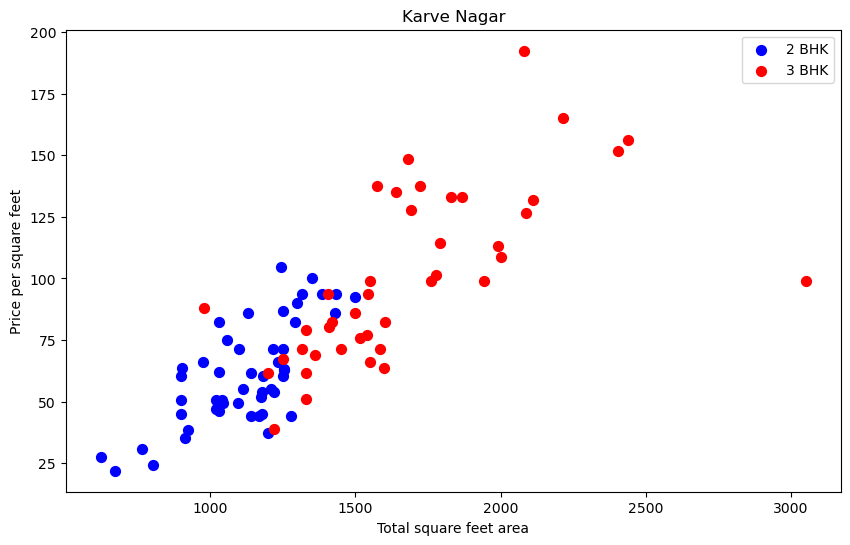

In [29]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Site_Location == location) & (df.bhk == 2)]
    bhk3 = df[(df.Site_Location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.New_Total_Sqft,bhk2.Price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.New_Total_Sqft,bhk3.Price,color='red',label='3 BHK',s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Karve Nagar") # it represents if price for 3 bhk is lesser than 2 bhk for same area

In [30]:
# removing above outliers by making a dictionary of mean std count of 1,2,3 bhk
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Site_Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7456, 7)

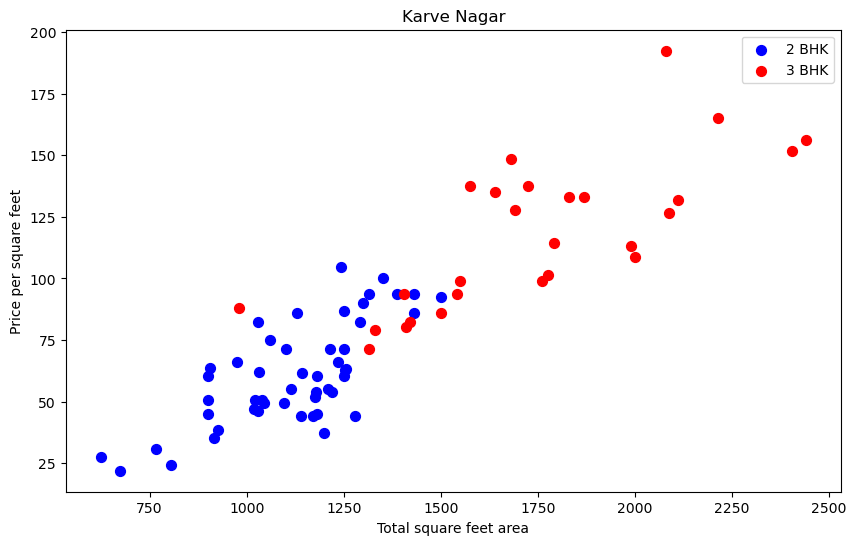

In [31]:
plot_scatter_chart(df7,"Karve Nagar")

Text(0, 0.5, 'Count')

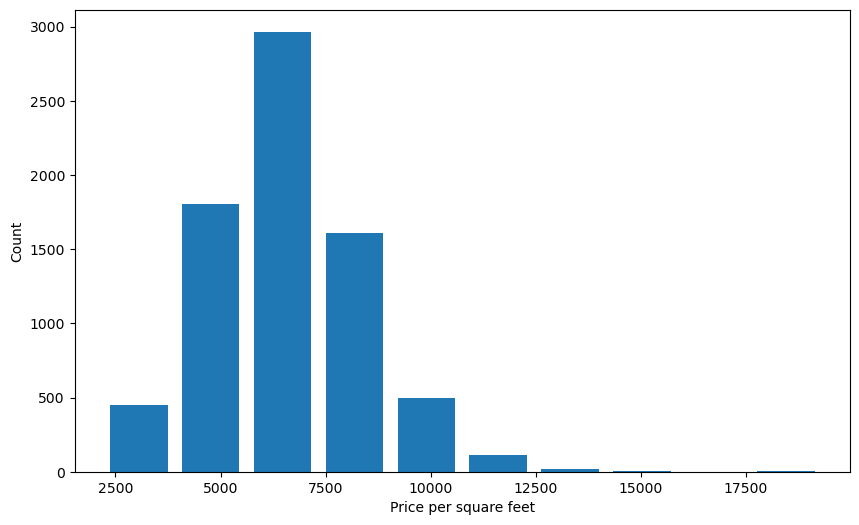

In [32]:
matplotlib.rcParams["figure.figsize"] = (10,6)
plt.hist(df7.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")
# here we can see the prices lie mostly between 2500 and 10000

In [33]:
df7.Bath.unique()

array([ 2,  4,  3,  5,  9,  1,  6,  7,  8, 12, 13, 16], dtype=int64)

In [34]:
df7[df7.Bath > 10]

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk,price_per_sqft
1222,Bibvewadi,11 BHK,12,6000.0,165.0,11,2750.000000
2662,Fatima Nagar,10 BHK,12,12000.0,577.5,10,4812.500000
5314,Kondhwa Khurd,13 BHK,13,5425.0,302.5,13,5576.036866
6407,Model colony,16 BHK,16,10000.0,605.0,16,6050.000000
10469,Wagholi,10 BHK,12,4000.0,176.0,10,4400.000000


Text(0, 0.5, 'Count')

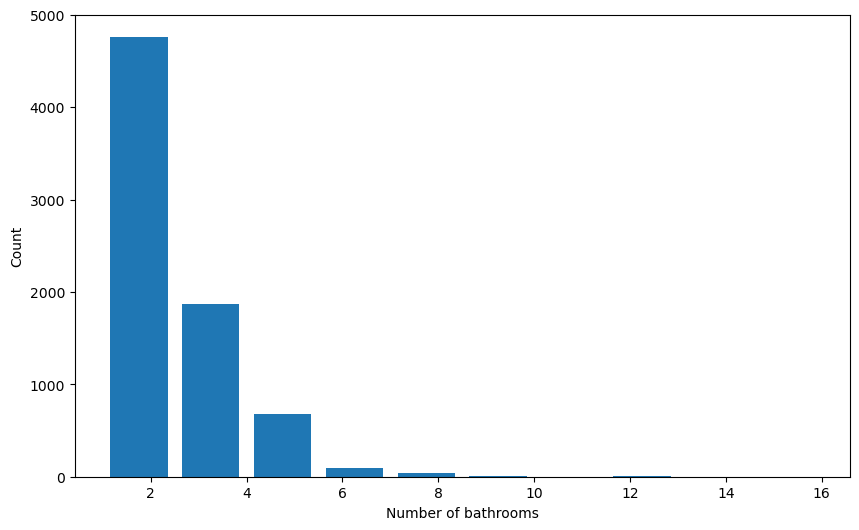

In [37]:
plt.hist(df7.Bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [38]:
df7[df7.Bath > df7.bhk+2] # detecting outliers having 2 more bathrooms than bedrooms

,Site_Location,Size,Bath,New_Total_Sqft,Price,bhk,price_per_sqft
779,Baner,3 BHK,6,1806.0,127.6,3,7065.337763
3100,Ghorpade Peth,6 BHK,9,11338.0,1100.0,6,9701.887458
4274,Karve Nagar,4 Bedroom,8,7000.0,495.0,4,7071.428571


In [40]:
df8 = df7[df7.Bath < df7.bhk+2]
df8.shape

(7391, 7)

In [41]:
df9 = df8.drop(['Size','price_per_sqft'], axis = 'columns')
df9.head()
# dropped columns which wer used for outlier detection and no longer necessary as we go into model training phase

,Site_Location,Bath,New_Total_Sqft,Price,bhk
0,Alandi Road,2,1056.0,42.977,2
1,Alandi Road,4,2894.0,269.500,4
2,Alandi Road,2,1084.0,55.000,2
3,Alandi Road,2,1230.0,88.000,2
4,Alandi Road,3,1750.0,143.000,3


In [42]:
# one-hot encoding
# location is our text data/ categorical which we need to convert into numeric form for model training
dummies = pd.get_dummies(df9.Site_Location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df10 = pd.concat([df9,dummies], axis = 'columns') #dummy varaible trap
df10.head()

,Site_Location,Bath,New_Total_Sqft,Price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,2,1056.0,42.977,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Alandi Road,4,2894.0,269.500,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Alandi Road,2,1084.0,55.000,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Alandi Road,2,1230.0,88.000,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Alandi Road,3,1750.0,143.000,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df11 = df10.drop('Site_Location',axis='columns')
df11.head()

,Bath,New_Total_Sqft,Price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2,1056.0,42.977,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2894.0,269.500,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1084.0,55.000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1230.0,88.000,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1750.0,143.000,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df11.shape

(7391, 100)

In [52]:
x = df11.drop('Price',axis='columns')
x.head() # independent variable

,Bath,New_Total_Sqft,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2,1056.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2894.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1084.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1230.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1750.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
y = df11.Price
y.head() # dependent variable

0     42.977
1    269.500
2     55.000
3     88.000
4    143.000
Name: Price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8860465063381998

In [58]:
# k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82330965, 0.86469386, 0.88916743, 0.82946401, 0.8005267 ])

In [63]:
# grid-search cv, it runs our model on different regressors
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False] # hyper-parameter tuning
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.841973,{'fit_intercept': False}
1,lasso,0.839474,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.794571,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [64]:
x.columns

Index(['Bath', 'New_Total_Sqft', 'bhk', 'Alandi Road', 'Ambegaon Budruk',
       'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar', 'Baner',
       'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar', 'Dapodi',
       'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colo

In [65]:
np.where(x.columns=='Alandi Road')[0][0] # 3rd index

3

In [71]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = bath
    X[1] = sqft
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
        
    return lr_clf.predict([X])[0]

In [72]:
predict_price('Sinhagad Road',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.96510696411133

In [73]:
predict_price('Sinhagad Road',1000,3,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.08520126342773

In [77]:
predict_price('Dhankawadi',1000,2,2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56.96241569519043

In [78]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [79]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))